# Using Univariate selction with SelectKBest

In [11]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

data = pd.read_csv('Iris.csv')
x = data.iloc[:,:5]
x = x.drop(columns = ['Id'])
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [19]:
y = data['Species']
best_features = SelectKBest(score_func = chi2, k=2)
fit = best_features.fit(x,y)

In [25]:
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(x.columns)
feature_scores = pd.concat([df_columns,df_scores], axis = 1)
feature_scores.columns = ['column', 'score']
feature_scores

,column,score
0,SepalLengthCm,10.817821
1,SepalWidthCm,3.594499
2,PetalLengthCm,116.169847
3,PetalWidthCm,67.244828


          column       score
2  PetalLengthCm  116.169847
3   PetalWidthCm   67.244828
0  SepalLengthCm   10.817821


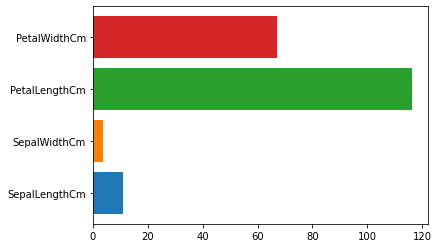

In [50]:
print(feature_scores.nlargest(3, 'score'))
import matplotlib.pyplot as plt
for i, j in zip(feature_scores['column'], feature_scores['score']):
    plt.barh(i,j)

# Using ETC

In [33]:
from sklearn.ensemble import ExtraTreesClassifier as ETC
model = ETC()
model = model.fit(x,y)

In [35]:
print(model.feature_importances_)

[0.10738254 0.06651611 0.44568953 0.38041181]


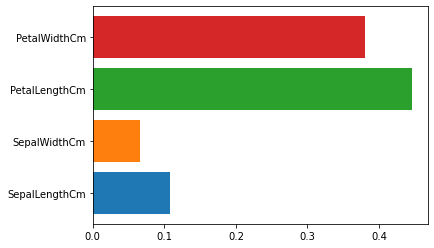

In [44]:
import matplotlib.pyplot as plt
for i, j in zip(model.feature_importances_, x.columns):
    plt.barh(j,i)

# Correlation

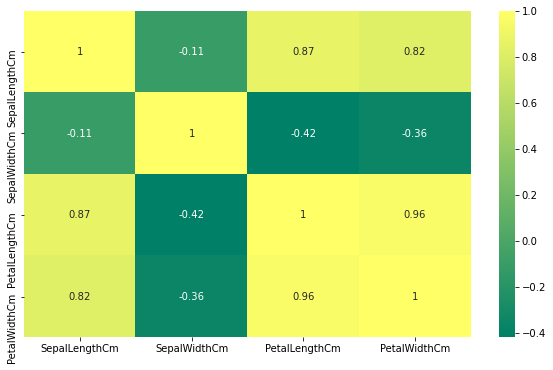

In [59]:
import seaborn as sb
plt.figure(figsize = (10,6))
sb.heatmap(x.corr(), annot = True, cmap = 'summer')